# Part2. 파이썬으로 인공 신경망 지접 만들기

## 17장 파이썬

## 18장 IPython

## 19장 파이썬 시작하기

In [2]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
for i in range(5):
    print(i)

0
1
2
3
4


### zero 행렬 만들기

In [8]:
import numpy as np
a = np.zeros([3,2])
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [11]:
a[2, 1] = 1

In [18]:
a

array([[ 1,  2],
       [ 9,  0],
       [ 0, 12]])

### 배열 시각화

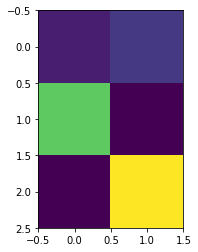

In [22]:
a = np.array([[1, 2], [9, 0], [0, 12]])
import matplotlib 
%matplotlib inline

matplotlib.pyplot.imshow(a, interpolation="nearest")

### 객체


In [24]:
class Dog:
    def bark(self):
        print("woof")
        pass
    
    pass

In [27]:
d = Dog()
d.bark()

woof


In [32]:
class Dog:
    _age = 0
    
    def __init__(self, name, temp, age):
        self.name = name
        self.temp = temp
        self._age = age
        pass
    
    def status(self):
        print(self.name, self.temp, self._age)
        pass
    
    pass
    
    

In [34]:
d = Dog("tw", 44, 32)
d.status()

tw 44 32


In [37]:
d.name, d.temp

('tw', 44)

In [38]:
d._age

32

## 20장 파이썬으로 인공 신경망 만들기

### Skelecton Code

1. 초기화: 입력, 은닉, 출력 노두 수 결정
2. 학습: 가중치 업데이트
3. 질의: 입력을 받아 연산후 출력에 전달

In [42]:
class neuralNetwork:
    
    def __init__(self):
        pass
    
    def train(self):
        pass
    
    def query(self):
        pass
    
    pass

### 신경망 초기화

- 초기화 대상
  - 입력 노드 수
  - 히든 노드 수
  - 출력 노드 수
  - Learning rate

In [47]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inputnodes = inputnodes
        self.hiddennodes = hiddennodes
        self.outputnodes = outputnodes
        
        self.learningrate = learningrate
        pass
    
    def train(self):
        pass
    
    def query(self):
        pass
    
    pass

inputnodes = 3
hiddennodes = 3
outputnodes = 3

learningrate = 0.3

n = neuralNetwork(inputnodes, hiddennodes, outputnodes, learningrate)

### 가중치 

- indennode ~ hiddennode의 가중치: {은닉 노드 수} X {입력 노드 수}
- hiddennode ~ outputnode의 가중치: {출력 노드 수} X {히든 노드 수}

#### mxn 행렬 초기화

In [50]:
import numpy as np
np.random.rand(3 ,2) #0 ~ 1

array([[ 0.71672815,  0.22492978],
       [ 0.07064334,  0.19824553],
       [ 0.00845033,  0.50263688]])

In [52]:
# 음수 가중치 적용 방법
np.random.rand(3 ,2) -0.5 # -0.5 ~ 0.5

array([[ 0.4041739 ,  0.14533019],
       [ 0.32904162,  0.27457803],
       [-0.29848626, -0.01851987]])

In [55]:
import numpy as np

class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inputnodes = inputnodes
        self.hiddennodes = hiddennodes
        self.outputnodes = outputnodes
        
        self.learningrate = learningrate
        
        self.wih = (np.random.rand(self.hiddennodes, self.inputnodes) - 0.5 )
        self.who = (np.random.rand(self.outputnodes, self.hiddennodes, 3) - 0.5)
        pass
    
    def train(self):
        pass
    
    def query(self):
        pass
    
    pass

inputnodes = 3
hiddennodes = 3
outputnodes = 3

learningrate = 0.3

n = neuralNetwork(inputnodes, hiddennodes, outputnodes, learningrate)

- 뒤에 노드를 처음에 명명하는 관례의 이유
![](./images/20/weight.png)

### 더 정교한 가중치

- 연결된 weight의 수의 역수를 취한 표준편차

In [73]:
import numpy as np
import scipy.special

class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inputnodes = inputnodes
        self.hiddennodes = hiddennodes
        self.outputnodes = outputnodes
        
        self.learningrate = learningrate
        
        # 노드에 연결될 연결 노드의 개수의 푸트 역수
        # shape
        self.wih = np.random.normal(0.0, pow(self.hiddennodes, -0.5), (self.hiddennodes, self.inputnodes))
        self.who = np.random.normal(0.0, pow(self.outputnodes, -0.5), (self.outputnodes, self.hiddennodes))
        
        self.activation_function = lambda x:scipy.special.expit(x)

        pass
    
    def train(self):
        pass
    
    def query(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
        #X_hidden = W_input I
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(hidden_outputs)
        
        
        return final_outputs
    
    pass

inputnodes = 3
hiddennodes = 3
outputnodes = 3

learningrate = 0.3

n = neuralNetwork(inputnodes, hiddennodes, outputnodes, learningrate)

n.query([1.0, 0.5, -1.5])

array([[ 0.59211836],
       [ 0.59144738],
       [ 0.64031227]])

### 신경망 학습시키기

In [76]:
import numpy as np
import scipy.special

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inputnodes = inputnodes
        self.hiddennodes = hiddennodes
        self.outputnodes = outputnodes
        
        self.learningrate = learningrate
        
        # 노드에 연결될 연결 노드의 개수의 푸트 역수
        # shape
        self.wih = np.random.normal(0.0, pow(self.hiddennodes, -0.5), (self.hiddennodes, self.inputnodes))
        self.who = np.random.normal(0.0, pow(self.outputnodes, -0.5), (self.outputnodes, self.hiddennodes))   
        self.activation_function = lambda x:scipy.special.expit(x)

        pass
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T      
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)       
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_error = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_error)
        
        self.who += self.learningrate * np.dot((output_error*final_outputs*(1-final_outputs)),
                                              hidden_outputs.T)
        self.wih += self.learningrate * np.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),
                                              inputs.T)
        pass
    
    def query(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
        #X_hidden = W_input I
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(hidden_outputs)
        
        return final_outputs
    
    pass

inputnodes = 3
hiddennodes = 3
outputnodes = 3
learningrate = 0.3

n = neuralNetwork(inputnodes, hiddennodes, outputnodes, learningrate)
n.train([1.0, 0.5, -1.5],[1.0, 0.5, -1.5])

## 21장 MNIST 손슬씨 데이터 인식하기

- MNNIST
  - http://yann.lecun.com/exdb
  - http://pjreddie.com/projects/mnist-in-csv
    - train data-60k: https://pjreddie.com/media/files/mnist_train.csv
    - test data-10k: https://pjreddie.com/media/files/mnist_test.csv
    - train_100: https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv
    - test_10:   https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_test_10.csv
    
    
     

- data
  - training data: 60,000
  - test data: 10,000

## 데이터 읽기

In [82]:
train_data = open('./data/mnist_train_100.csv','r')
data_list = train_data.readlines()

print(len(data_list))

train_data.close()

100


In [84]:
data_list[0][0]

'5'

In [90]:
data_list[1]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

In [103]:
all_values = data_list[0].split(',')

In [104]:
len(all_values)

785

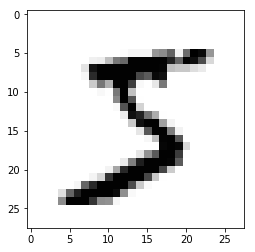

In [107]:
import matplotlib.pyplot as plt
import numpy as np
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28)) #문자열을 실수로 변환
plt.imshow(image_array, cmap="Greys", interpolation='None')

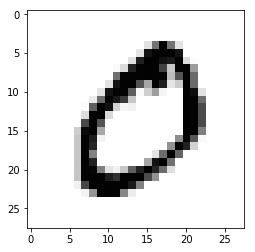

In [108]:
import matplotlib.pyplot as plt
import numpy as np
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28)) #문자열을 실수로 변환
plt.imshow(image_array, cmap="Greys", interpolation='None')